In [5]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np
import gffutils
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.set_palette('colorblind')
from dna_features_viewer import GraphicFeature, GraphicRecord
from dna_features_viewer import BiopythonTranslator

from ete3 import Tree 
import json
sns.set_palette('Dark2')

# Figure Generation For ON WTD Manuscript

## Divergence Time Date

In [6]:
global_tree = Tree('analyses/treetime/augur_output/global_tree_figure_2_treetime.nwk', format=1)
ON_WTD_human_deer_mrca = global_tree.search_nodes(name='NODE_0000809')[0]

ON_WTD_clade_mrca = global_tree.search_nodes(name='NODE_0000808')[0]
ON_WTD_clade_MI_human_mrca = global_tree.search_nodes(name='NODE_0000806')[0]

In [7]:
with open('analyses/treetime/augur_output/global_tree_figure_2_treetime_node_data.json') as fh:
    treetime_data = json.load(fh)
    
def decimal_to_datetime(numdate):
    from calendar import isleap
    import datetime
    days_in_year = 366 if isleap(int(numdate)) else 365
    # add a small number of the time elapsed in a year to avoid
    # unexpected behavior for values 1/365, 2/365, etc
    days_elapsed = int(((numdate%1)+1e-10)*days_in_year)
    date = datetime.datetime(int(numdate),1,1) + datetime.timedelta(days=days_elapsed)
    return date

In [8]:
key_nodes = {'Ancestral Node': ['ON WTD and Human', 'ON WTD Lineage', 'ON WTD Lineage and Closest Relative'],
             'Node': ['NODE_0000809', 'NODE_0000808', 'NODE_0000806']}

key_nodes = pd.DataFrame(key_nodes)

key_nodes['tMRCA estimate'] = key_nodes['Node'].apply(lambda x: treetime_data['nodes'][x]['numdate'])
key_nodes['tMRCA estimate'] = key_nodes['tMRCA estimate'].apply(lambda x: decimal_to_datetime(x).strftime('%Y-%m-%d'))

key_nodes['Length of Branch in Mutations'] = key_nodes['Node'].apply(lambda x: treetime_data['nodes'][x]['mutation_length'])

key_nodes['tMRCA lower CI'] = key_nodes['Node'].apply(lambda x: treetime_data['nodes'][x]['num_date_confidence'][0])
key_nodes['tMRCA lower CI'] = key_nodes['tMRCA lower CI'].apply(lambda x: decimal_to_datetime(x).strftime('%Y-%m-%d'))

key_nodes['tMRCA upper CI'] = key_nodes['Node'].apply(lambda x: treetime_data['nodes'][x]['num_date_confidence'][1])
key_nodes['tMRCA upper CI'] = key_nodes['tMRCA upper CI'].apply(lambda x: decimal_to_datetime(x).strftime('%Y-%m-%d'))

key_nodes['tMRCA'] = key_nodes['tMRCA estimate'] + " (" + key_nodes['tMRCA lower CI'] + " - " +  key_nodes['tMRCA upper CI'] + ')'
key_nodes[['Ancestral Node', 'Length of Branch in Mutations', 'tMRCA']]

,Ancestral Node,Length of Branch in Mutations,tMRCA
0,ON WTD and Human,2,2021-08-09 (2021-01-12 - 2021-09-28)
1,ON WTD Lineage,49,2021-07-19 (2020-12-17 - 2021-09-20)
2,ON WTD Lineage and Closest Relative,14,2020-08-12 (2020-04-08 - 2020-10-07)


## Tip To Tree Regression


In [9]:
# global_human = samples_in_tree.loc[samples_in_tree['Host'] == 'Human']
# global_human.loc[:, 'Sequence Group'] = "Global human"

# b1 = samples_in_tree.loc[samples_in_tree['Pango lineage'] == 'B.1']
# b1.loc[:, 'Sequence Group'] = "B.1"

# on_WTD = ['4658', '4645', '4534', '4538', '4662', '4581', '4649', 'Canada/ON-PHL-21-44225/2021']
# on_WTD_df = samples_in_tree.loc[on_WTD]
# on_WTD_df.loc[:, 'Sequence Group'] = 'ON WTD+Human'


# samples_in_tree = samples_in_tree.reset_index()
# global_animal = samples_in_tree.loc[(samples_in_tree['Host'] != 'Human') & (~samples_in_tree['Virus name'].isin(on_WTD))]
# global_animal = global_animal.set_index('Virus name')
# global_animal.loc[:, 'Sequence Group'] = "Global animal"
# samples_in_tree = samples_in_tree.set_index('Virus name')


# tip_to_tree_data = pd.concat([global_human, global_animal, b1, on_WTD_df])


## Mutational Summary Table

In [11]:
mutations = pd.read_excel('tables/Table_S2_summary_list_of_mutations.xlsx', skipfooter=4)
mutations['Samplea'] = mutations['Samplea'].astype(str)
consensus_mutations = mutations[mutations['Samplea'].str.contains('All')]
print("|Gene|Mutation|")
print("---------------")
for mutation in consensus_mutations[consensus_mutations['Mutation Effect'] != 'Synonymous']['Mutation / GISAID Mutation Notation'].values:
     print(" | " + mutation.split(':')[0] + " | "  + mutation.split(':')[1] + " |")

|Gene|Mutation|
---------------
 | ORF1a | T265I (C1059T) / NSP2_T85I |
 | ORF1a | T708I (C2388T) / NSP2_T528I |
 | ORF1a | A1283V (C4113T) / NSP3_A465V |
 | ORF1a | A1314V (C4206T) / NSP3_A496V |
 | ORF1a | N2038delinsMRASD (A6377ATGCGTGCGTCGG) / NSP3_ins1219MRAS |
 | ORF1a | N2038delinsMRASD (A6377ATGCGTGCGTCGG) / NSP3_N1220D |
 | ORF1a | S2255F (C7029T) / NSP3_S1437F |
 | ORF1a | S2500F (C7764T) / NSP3_S1682F |
 | ORF1a | L3116F (C9611T) / NSP4_L353F |
 | ORF1a | S3149F (CC9711TT) / NSP4_S386F |
 | ORF1a | K3353R (A10323G) / NSP5_K90R |
 | ORF1a | S3983F (C12213T) / NSP8_S41F |
 | ORF1a | L4111F (C12596T) / NSP8_L169F |
 | ORF1a | T4164I (C12756T) / NSP9_T24I |
 | ORF1a | T4174I (C12786T) / NSP9_T34I |
 | ORF1b | I201V (A14041G) / NSP12_I201V |
 | ORF1b | P323L (C14408T) / NSP12_P323L |
 | ORF1b | V373L (G14557T) / NSP12_V373L |
 | ORF1b | V1280L (G17278T) / NSP13_V348L |
 | ORF1b | M1702I (G18546T) / NSP14_M169I |
 | ORF1b | P1736S (C18646T) / NSP14_P203S |
 | ORF1b | D2151Y (G1989

In [12]:
consensus_mutations['Mutation Effect']

2        Missense
4      Synonymous
5      Synonymous
7        Missense
8      Synonymous
          ...    
149      Missense
150      Missense
151      Missense
152    Synonymous
154      Missense
Name: Mutation Effect, Length: 76, dtype: object

In [13]:
consensus_mutations[consensus_mutations['Mutation Effect'] == 'Synonymous']['Mutation / GISAID Mutation Notation'].str.split(':').str.get(0).value_counts()

ORF1a                            21
ORF1b                             7
S                                 3
E                                 2
M                                 2
ORF6                              1
ORF6_D61D (T27384C) / NS6_D61     1
ORF10                             1
Name: Mutation / GISAID Mutation Notation, dtype: int64

# Mutation Counts

Total mutations

In [15]:
consensus = mutations[mutations['Samplea'].str.contains('All')]
consensus['Non-Human Host (Prevalence)d'] = consensus['Non-Human Host (Prevalence)d'].fillna('Not Seen Before')
print(f"Total mutations {consensus.shape[0]}")
print(f"Mutations previously seen in deer {consensus[consensus['Non-Human Host (Prevalence)d'].str.lower().str.contains('deer')].shape[0]}")
print(f"Mutations not previously seen in deer {consensus[~consensus['Non-Human Host (Prevalence)d'].str.lower().str.contains('deer')].shape[0]}")

previous_animal = consensus[~consensus['Non-Human Host (Prevalence)d'].isin(['Only human', 'Not Seen Before'])]
print(f"Mutations previously seen in animals {previous_animal.shape[0]}")
print(f"Mutations not previously seen in animals {consensus[consensus['Non-Human Host (Prevalence)d'].isin(['Only human', 'Not Seen Before'])].shape[0]}")

print(f"Mutations previously seen in animals but new to deer {previous_animal[~previous_animal['Non-Human Host (Prevalence)d'].str.lower().str.contains('deer')].shape[0]}")
#print(f"Mutations not previously seen in deer {consensus[~consensus['Non-Human Host (Prevalence)d'].str.lower().str.contains('deer')].shape[0]}")

Total mutations 76
Mutations previously seen in deer 14
Mutations not previously seen in deer 62
Mutations previously seen in animals 37
Mutations not previously seen in animals 39
Mutations previously seen in animals but new to deer 23


/tmp/ipykernel_196106/735605505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consensus['Non-Human Host (Prevalence)d'] = consensus['Non-Human Host (Prevalence)d'].fillna('Not Seen Before')


In [16]:
total_human = mutations[mutations['Samplea'].str.contains('human')]
unique_human = mutations[mutations['Samplea'] == '1 human']
print(f"Similarity of human to deer consensus: {total_human.shape[0] - unique_human.shape[0]}/{total_human.shape[0]}")

Similarity of human to deer consensus: 80/90


Number of mutations shared with common ancestor of MDHHS samples (list derived from nextstrain)

In [17]:
mdhhs_branch = set("C1376T, T9711C, C9886T, A10867G, C11620T, C13166T, A19611G, C20307T, C20457T, C28153T, C28603T".split(', '))
mdhhs_total = set("C241T, C1059T, C1376T, C3037T, G6894T, C7267T, C9430T, C9724T, C9886T, A10323G, A10867G, C11620T, C12073T, C12076T, C12213T, C12596T, C12756T, C12786T, C13166T, G13459A, C14408T, A16266G, C16329T, A17199G, A19611G, C20307T, C20457T, C21846T, T23020G, A23064C, A23403G, G25563T, T26047G, T26160C, C27131T, C27972T, C27981T, G27996T, C28153T, G28209T, C28603T, T28889, T9711C".split(', '))
ON_WTD_mdhss_common_ancestor = mdhhs_total - mdhhs_branch

mutations['nt_mutations'] = mutations['Mutation / GISAID Mutation Notation'].str.extract('\((.*)\)')
ON_WTD_consensus_mutations = set(mutations.loc[mutations['Samplea'].str.contains('All'), 'nt_mutations'].unique())

print(f"Mutations since ON_WTD MDHSS common ancestor {len(ON_WTD_consensus_mutations - ON_WTD_mdhss_common_ancestor)}")

Mutations since ON_WTD MDHSS common ancestor 49


In [18]:
shared_mutations = mutations.loc[mutations['Samplea'].str.contains('All')]
shared_mutations['Mutation Effect'].value_counts()

Synonymous                      38
Missense                        35
Disruptive inframe insertion     1
Disruptive inframe deletion      1
Stop gained                      1
Name: Mutation Effect, dtype: int64

In [19]:
shared_mutation_count = shared_mutations['Mutation / GISAID Mutation Notation'].str.split(':').str.get(0).str.split('_').str.get(0).value_counts()

In [20]:
shared_mutation_count

ORF1a    36
ORF1b    15
S         9
E         3
N         3
ORF3a     2
M         2
ORF6      2
ORF8      2
ORF10     2
Name: Mutation / GISAID Mutation Notation, dtype: int64

In [21]:
mutations[(mutations['Mutation / GISAID Mutation Notation'].str.startswith('S:')) & \
          (mutations['Mutation Effect'] != 'Synonymous') & \
          (~mutations['Samplea'].str.startswith('All'))]

,Samplea,Mutation / GISAID Mutation Notation,Mutation Effect,Total Worldwide (GISAID)b,Total Canada (GISAID)b,VOCc,Non-Human Host (Prevalence)d,nt_mutations
100,4658,S:T22I (C21627T) / Spike_T22I,Missense,13397.0,258.0,"α, δ, ο",white-tailed deer (1),C21627T
107,4658,S:S247G (A22301G) / Spike_S247G,Missense,340.0,0.0,"α, δ, ο","bat sp. (4), pangolin (11)",A22301G
112,1 human,S:Q613H (G23401T) / Spike_Q613H,Missense,58260.0,19185.0,"α, δ, ο","cat (1), white-tailed deer (1), mink (1; 0 MI)",G23401T
114,4662,S:V705A (T23676C) / Spike_V705A,Missense,28.0,0.0,"α, δ, ο",Only human,T23676C
117,4662,S:L959 (CTT24435C [FRAMESHIFT]),Frameshift,NaN,NaN,NaN,NaN,CTT24435C [FRAMESHIFT]
118,1 human,S:L1265I (C25355A) / Spike_L1265I,Missense,177.0,2.0,"α, δ, ο",Only human,C25355A


In [22]:
mutations

,Samplea,Mutation / GISAID Mutation Notation,Mutation Effect,Total Worldwide (GISAID)b,Total Canada (GISAID)b,VOCc,Non-Human Host (Prevalence)d,nt_mutations
0,4658,ORF1a:H13H (C304T) / NSP1_H13,Synonymous,1191.0,20.0,"α, δ, ο",Only human,C304T
1,4658,ORF1a:Y136Y (C673T) / NSP1_Y136,Synonymous,1401.0,29.0,"α, δ, ο","pangolin (5), bat sp. (5)",C673T
2,"All (5 deer, 1 human)",ORF1a:T265I (C1059T) / NSP2_T85I,Missense,423398.0,14605.0,"α, δ, ο","dog (12), cat (26), white-tailed deer(92), tig...",C1059T
3,4662,ORF1a:N313S (A1203G) / NSP2_N133,Synonymous,1167.0,12.0,"α, δ, ο",dog (1),A1203G
4,"All (5 deer, 1 human)",ORF1a:A339A (C1282T) / NSP2_A159,Synonymous,18499.0,67.0,"α, δ, ο",Only human,C1282T
...,...,...,...,...,...,...,...,...
151,"All (5 deer, 1 human)",N:T391I (C29445T) / N_T391I,Missense,20642.0,1211.0,"α, δ, ο","cat (3), lion (1), white-tailed deer (26)",C29445T
152,"All (5 deer, 1 human)",ORF10:F7F (C29578T),Synonymous,NaN,NaN,NaN,NaN,C29578T
153,4662,ORF10:Y26Y (C29635T),Synonymous,NaN,NaN,NaN,NaN,C29635T
154,"All (5 deer, 1 human)",ORF10:L37F (C29666T),Missense,NaN,NaN,NaN,NaN,C29666T


In [23]:
mutations[mutations['Mutation / GISAID Mutation Notation'].str.startswith('S:')]

,Samplea,Mutation / GISAID Mutation Notation,Mutation Effect,Total Worldwide (GISAID)b,Total Canada (GISAID)b,VOCc,Non-Human Host (Prevalence)d,nt_mutations
100,4658,S:T22I (C21627T) / Spike_T22I,Missense,13397.0,258.0,"α, δ, ο",white-tailed deer (1),C21627T
101,4658,S:F32F (C21658T) / Spike_F32,Synonymous,1619.0,14.0,"α, δ, ο","pangolin (17), bat sp. (18)",C21658T
102,4662,S:F43F (C21691T) / Spike_F43,Synonymous,308.0,0.0,"α, δ, ο",bat sp. (8),C21691T
103,"All (5 deer, 1 human)",S:H49Y (C21707T) / Spike_H49Y,Missense,12853.0,305.0,"α, δ, ο","cat (1), hamster (4), Roborovski hamster (1), ...",C21707T
104,"All (5 deer, 1 human)",S:F55F (C21727T) / Spike_F55,Synonymous,1272.0,2.0,"α, δ, ο",Only human,C21727T
105,"All (5 deer, 1 human)",S:T95I (C21846T) / Spike_T95I,Missense,3026465.0,42004.0,"α, δ, ο","dog, hyena, cat, gorilla, hippo, tiger sp., li...",C21846T
106,"All (5 deer, 1 human)",S:V143_Y145DELINSD (GTTTATT21989G) / Spike_V14...,Disruptive inframe deletion,1305753.0,20835.0,"α, δ, ο","cat (1), pangolin (12), white-tailed deer (13)...",GTTTATT21989G
107,4658,S:S247G (A22301G) / Spike_S247G,Missense,340.0,0.0,"α, δ, ο","bat sp. (4), pangolin (11)",A22301G
108,4662,S:F306F (C22480T) / Spike_F306,Synonymous,2603.0,4.0,"α, δ, ο","pangolin (17), bat sp. (7)",C22480T
109,"All (5 deer, 1 human)",S:F486L (T23020G) / Spike_F486L,Missense,439.0,2.0,"α, δ, ο","bat (1), mink (295; 55 MI), pangolin (5)",T23020G


## Mutation Distribution 

In [24]:
!mkdir -p analyses/mutation_distribution_across_genomes
!mkdir -p reference_data

In [25]:
db = gffutils.create_db('reference_data/GCF_009858895.2_ASM985889v3_genomic.gff', dbfn='analyses/mutation_distribution_across_genomes/ncov_ref.db', force=True, keep_order=True, merge_strategy='merge', sort_attribute_values=True)

total_genome_length = 29903
feature_lengths = {'Name': [], "Start": [], 'End': []}

for gene in db.features_of_type('gene'):
    feature_lengths['Name'].append(gene.attributes['Name'][0])
    feature_lengths['Start'].append(gene.start)
    feature_lengths['End'].append(gene.stop)
    

for nsp in db.features_of_type('mature_protein_region_of_CDS'):
    if nsp.attributes['product'][0] != 'RNA-dependent RNA polymerase':
        feature_lengths['Name'].append(nsp.attributes['product'][0])
        feature_lengths['Start'].append(nsp.start)
        feature_lengths['End'].append(nsp.stop)    
    
feature_lengths['Name'].append('ORF1a')
feature_lengths['Start'].append(266)
feature_lengths['End'].append(13468)

feature_lengths['Name'].append('ORF1b')
feature_lengths['Start'].append(13468)
feature_lengths['End'].append(21555)

feature_lengths['Name'].append('RNA-dependent RNA polymerase')
feature_lengths['Start'].append(13442)
feature_lengths['End'].append(16236)

feature_lengths = pd.DataFrame(feature_lengths).drop_duplicates()
feature_lengths

feature_lengths['Length'] = feature_lengths['End'] - feature_lengths['Start']
feature_lengths['Proportion of Genome'] = feature_lengths['Length'] / total_genome_length
feature_lengths["Expected Mutations"] = shared_mutation_count.sum() * feature_lengths['Proportion of Genome']
feature_lengths = feature_lengths.set_index('Name')



feature_lengths = feature_lengths.rename(index={'leader protein': 'nsp1',
                                                '3C-like proteinase': 'nsp5',
                                                'RNA-dependent RNA polymerase': 'nsp12',
                                                 'helicase': 'nsp13',
                                                 "3'-to-5' exonuclease": 'nsp14',
                                                 'endoRNAse': 'nsp15',
                                                 "2'-O-ribose methyltransferase": 'nsp16'})

In [26]:
from collections import defaultdict
mutation_counts = defaultdict(list)

for mutation in shared_mutations['Mutation / GISAID Mutation Notation']:
    #print(mutation)
    if 'NSP' in mutation:
        nsp_mut = mutation.split(' / ')[1]
        nsp = nsp_mut.split('_')[0].lower()
        mutation_counts[nsp].append(nsp_mut)

        mutation_counts[mutation.split(':')[0]].append(nsp_mut)
    elif mutation.split(':')[0] == 'ORF6_D61D (T27384C) / NS6_D61':
        mutation_counts['ORF6'].append(mutation)
    else:
        mutation_counts[mutation.split(':')[0]].append(mutation)

        

#print(mutation_counts)
mutation_counts = {k: len(v) for k,v in mutation_counts.items()}
mutation_counts['ORF1ab'] = mutation_counts['ORF1a'] + mutation_counts['ORF1b']
mutation_counts = pd.Series(mutation_counts)

feature_lengths['Actual Mutations'] = mutation_counts
feature_lengths = feature_lengths.fillna(0)

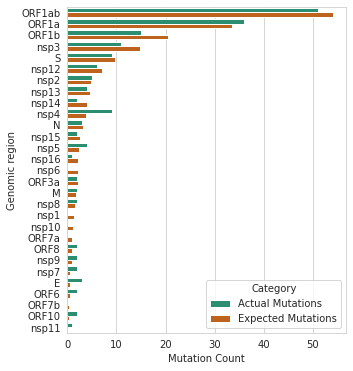

In [30]:
melt_df = pd.melt(feature_lengths.reset_index()[['Name', 'Actual Mutations', 'Expected Mutations']],
                     id_vars='Name', var_name='Category', value_name='Mutation Count')
melt_df = melt_df.rename(columns={'Name': 'Genomic region'})                  
                     
                     
                     #.sort_values('Actual/Expected'), y='Name', x='Actual/Expected')

plt.figure(figsize=(5,6))
sns.barplot(data = melt_df, 
            order=melt_df.loc[melt_df['Category']=='Expected Mutations'].sort_values('Mutation Count', ascending=False)['Genomic region'].values,
            y='Genomic region', x='Mutation Count', hue='Category')
plt.savefig('figures/supplemental/expected_vs_actual_mutations.jpg', dpi=600, bbox_inches='tight')
plt.savefig('figures/supplemental/expected_vs_actual_mutations.png', dpi=600, bbox_inches='tight')

In [28]:
relative_actual_vs_expected = feature_lengths['Actual Mutations'] / feature_lengths['Expected Mutations']
relative_actual_vs_expected.sort_values()

Name
ORF7a      0.000000
ORF7b      0.000000
nsp10      0.000000
nsp6       0.000000
nsp1       0.000000
nsp16      0.440605
nsp14      0.498051
ORF1b      0.729802
nsp3       0.741869
nsp15      0.758844
nsp12      0.844940
nsp13      0.873386
S          0.926759
N          0.937555
ORF1ab     0.942575
ORF3a      0.951537
nsp2       1.028386
ORF1a      1.072912
M          1.178026
nsp8       1.327017
nsp5       1.716295
ORF8       2.155948
nsp9       2.328169
nsp4       2.362338
nsp7       3.173069
ORF6       4.253627
E          5.199919
ORF10      6.783802
nsp11     10.354224
dtype: float64

In [31]:
feature_lengths

,Start,End,Length,Proportion of Genome,Expected Mutations,Actual Mutations
Name,,,,,,
ORF1ab,266,21555,21289,0.711935,54.107080,51.0
S,21563,25384,3821,0.127780,9.711266,9.0
ORF3a,25393,26220,827,0.027656,2.101863,2.0
E,26245,26472,227,0.007591,0.576932,3.0
M,26523,27191,668,0.022339,1.697756,2.0
ORF6,27202,27387,185,0.006187,0.470187,2.0
ORF7a,27394,27759,365,0.012206,0.927666,0.0
ORF7b,27756,27887,131,0.004381,0.332943,0.0
ORF8,27894,28259,365,0.012206,0.927666,2.0


In [32]:
orf1ab_length = 21555 - 265 
spike_length = 25384 - 21562
total_genome_length = 29903+1

print(f"Excepted ORF1ab mutations {shared_mutations.shape[0] * (orf1ab_length / total_genome_length)}")
print(f"Excepted Spike mutations {shared_mutations.shape[0] * (spike_length / total_genome_length)}")


orf1ab_length / 229903 * 100

Excepted ORF1ab mutations 54.10781166399144
Excepted Spike mutations 9.713483146067416


9.260427223655194

In [33]:
orf1ab_length / total_genome_length * 100

71.19448903156768

In [34]:
spike_length / total_genome_length * 100

12.780898876404494

# Generate Spike Figure Base

In [35]:
pd.set_option('display.max_colwidth', None)
mutations.loc[mutations['Mutation / GISAID Mutation Notation'].str.startswith('S:'), ['Samplea', 'Mutation / GISAID Mutation Notation', 'Mutation Effect', 'Non-Human Host (Prevalence)d']]

,Samplea,Mutation / GISAID Mutation Notation,Mutation Effect,Non-Human Host (Prevalence)d
100,4658,S:T22I (C21627T) / Spike_T22I,Missense,white-tailed deer (1)
101,4658,S:F32F (C21658T) / Spike_F32,Synonymous,"pangolin (17), bat sp. (18)"
102,4662,S:F43F (C21691T) / Spike_F43,Synonymous,bat sp. (8)
103,"All (5 deer, 1 human)",S:H49Y (C21707T) / Spike_H49Y,Missense,"cat (1), hamster (4), Roborovski hamster (1), white-tailed deer (3)"
104,"All (5 deer, 1 human)",S:F55F (C21727T) / Spike_F55,Synonymous,Only human
105,"All (5 deer, 1 human)",S:T95I (C21846T) / Spike_T95I,Missense,"dog, hyena, cat, gorilla, hippo, tiger sp., lion, mink (7; 0 MI), hamster"
106,"All (5 deer, 1 human)",S:V143_Y145DELINSD (GTTTATT21989G) / Spike_V143/V145del,Disruptive inframe deletion,"cat (1), pangolin (12), white-tailed deer (13), bat sp. (7), mink (73; 0 MI)"
107,4658,S:S247G (A22301G) / Spike_S247G,Missense,"bat sp. (4), pangolin (11)"
108,4662,S:F306F (C22480T) / Spike_F306,Synonymous,"pangolin (17), bat sp. (7)"
109,"All (5 deer, 1 human)",S:F486L (T23020G) / Spike_F486L,Missense,"bat (1), mink (295; 55 MI), pangolin (5)"


In [36]:
spike_features = [GraphicFeature(start=0, end=1273, strand=0, color="#56b4e9",label="Spike"),
                  GraphicFeature(start=14, end=303, strand=0, color="#0173b2", label="NTD"),
                  GraphicFeature(start=319, end=541, strand=0, color="#0173b2", label="RBD"),
                  GraphicFeature(start=685, end=686, strand=0, color="#0173b2", label="Furin cleavage"),
                  GraphicFeature(start=0, end=685, strand=0, color="#0173b2", label="S1"),
                  GraphicFeature(start=686, end=1273, strand=0, color="#0173b2", label="S2"),
                  GraphicFeature(start=816, end=837, strand=0, color="#0173b2", label="Fusion"),
                  GraphicFeature(start=835, end=855, strand=0, color="#0173b2" , label="Fusion"),
                  GraphicFeature(start=920, end=970, strand=0, color="#0173b2", label="Heptad"),
                  GraphicFeature(start=1163, end=1202, strand=0, color="#0173b2", label="Heptad"),
                  GraphicFeature(start=1214, end=1234, strand=0, color="#0173b2", label="TM")]


spike_mutations = [
    
                  GraphicFeature(start=22, end=22, strand=0, color="#7570B3",label="T22I"),
                  GraphicFeature(start=32, end=32, strand=0, color="#7570B3",label="F32F"),
                  GraphicFeature(start=43, end=43, strand=0, color="#7570B3",label="F43F"),
    
                  GraphicFeature(start=49, end=49, strand=0, color="#d95f02", label="H49Y"),
                  GraphicFeature(start=55, end=55, strand=0, color="#d95f02", label="F55F"),
                  GraphicFeature(start=95, end=95, strand=0, color="#d95f02", label="T95I"),
                  GraphicFeature(start=143, end=145, strand=0, color="#d95f02",label="DELV143-Y145"),
    
                  GraphicFeature(start=247, end=247, strand=0, color="#7570B3",label="S247G"),
                  GraphicFeature(start=306, end=306, strand=0, color="#7570B3",label="F306F"),    
    
                  GraphicFeature(start=486, end=486, strand=0, color="#d95f02" , label="F486L"),
                  GraphicFeature(start=501, end=501, strand=0, color="#d95f02", label="N501T"),
                  GraphicFeature(start=612, end=612, strand=0, color="#d95f02", label="Y612Y"),
    
                  GraphicFeature(start=613, end=613, strand=0, color="#e6ab02", label="Q613H"), # human only
    
                  GraphicFeature(start=614, end=614, strand=0, color="#d95f02", label="D614G"),

                  GraphicFeature(start=705, end=705, strand=0, color="#7570B3",label="V705A"),
                  GraphicFeature(start=774, end=774, strand=0, color="#7570B3",label="Q774Q"),
    
                  GraphicFeature(start=822, end=822, strand=0, color="#d95f02", label="L822L"),
    

                  GraphicFeature(start=959, end=959, strand=0, color="#7570B3",label="L959 FS"),
   
    
                  GraphicFeature(start=1265, end=1265, strand=0, color="#e6ab02", label="L1265I")]


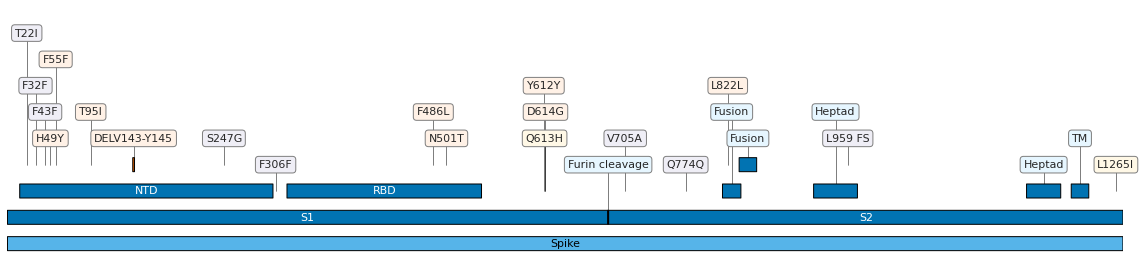

In [37]:
record = GraphicRecord(sequence_length=1273, features=spike_features + spike_mutations)
ax, _ = record.plot(figure_width=20, with_ruler=False)

ax.figure.savefig('figures/intermediate/raw_spike.svg')

## Taxonomic Profiling



In [2]:
sra_accs = pd.read_csv('analyses/contamination_check_taxonomic_read_profiling/SraRunTable.txt', sep=',')
sra_accs = sra_accs[['Run', 'Isolation_source', 'Library Name']].set_index('Run')
kreports = []
for kreport in Path("analyses/contamination_check_taxonomic_read_profiling/kraken2_output").glob("*.kreport"):
    kreport_df = pd.read_csv(kreport, sep='\t', names=['% of reads', 'cumulative number of reads', 'number of reads', 'taxa rank', 'taxid', 'sciname'])
    kreport_df['Sample'] = kreport.name.split('_')[0]
    kreport_df['sciname'] = kreport_df['sciname'].str.strip()
    kreport_df['Database'] = kreport.name.split('_', 1)[1].split('.')[0]
    kreports.append(kreport_df)
    
kreports = pd.concat(kreports).set_index('Sample')
kreports['Isolation_source'] = sra_accs['Isolation_source']
kreports['Library Name'] = sra_accs['Library Name']
kreports = kreports.reset_index()

# let's check there was nothing weird picked up in the big database (without WTD)
k2pfp = kreports[kreports['Database'] == 'k2pfp_db']
top3 = k2pfp.groupby(['Library Name', 'Isolation_source'])['number of reads'].nlargest(3).reset_index(level=2)['level_2']
top3 = k2pfp.loc[top3]

print(top3.groupby('Isolation_source')['sciname'].value_counts())
print(top3.groupby('Library Name')['sciname'].value_counts())



Isolation_source            sciname                                        
nasal swab                  Severe acute respiratory syndrome coronavirus 2    8
                            unclassified                                       8
                            Bacteria                                           4
                            Homo sapiens                                       3
                            Pseudomonas                                        2
                            Babesia bigemina                                   1
                            Curtobacterium sp. Csp2                            1
                            Pseudomonas fragi                                  1
                            Pseudomonas rhodesiae                              1
                            Pseudomonas versuta                                1
retropharyngeal lymph node  Severe acute respiratory syndrome coronavirus 2    4
                            uncla

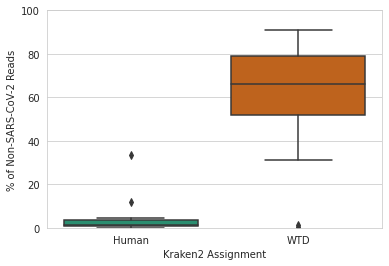

In [3]:
# Summarise 3 key taxa from custom db
key_taxa = kreports[kreports['Database'] == 'wtd_db']
key_taxa = key_taxa[key_taxa['sciname'].isin(['Homo sapiens', 'Odocoileus virginianus', 'Severe acute respiratory syndrome coronavirus 2'])]

key_taxa = pd.pivot(key_taxa, index='Library Name', columns='sciname', values='% of reads')
key_taxa['Non-SARS-CoV-2 Reads'] = 100 - key_taxa['Severe acute respiratory syndrome coronavirus 2']
key_taxa['% non-SC2 Human'] = key_taxa['Homo sapiens'] / key_taxa['Non-SARS-CoV-2 Reads'] * 100
key_taxa['% non-SC2 deer'] = key_taxa['Odocoileus virginianus'] / key_taxa['Non-SARS-CoV-2 Reads'] * 100

kraken_data = pd.melt(key_taxa[['% non-SC2 Human', '% non-SC2 deer']].reset_index(), id_vars='Library Name', var_name='Kraken2 Assignment', value_name='% of Non-SARS-CoV-2 Reads').replace({'% non-SC2 Human': 'Human', "% non-SC2 deer": 'WTD'})
sns.boxplot(data = kraken_data, y='% of Non-SARS-CoV-2 Reads', x='Kraken2 Assignment')
plt.ylim(0,100)
plt.savefig('figures/supplemental/contamination_check.png', dpi=300, bbox_inches='tight')

In [72]:
bwa_reports = []
for bwa_report in Path("analyses/contamination_check_taxonomic_read_profiling/bwa_output").glob("*_composite_mapping.tsv"):
    bwa_df = pd.read_csv(bwa_report, sep='\t')
    bwa_reports.append(bwa_df)
    
bwa_reports = pd.concat(bwa_reports).set_index('Sample')
bwa_reports['Isolation_source'] = sra_accs['Isolation_source']
bwa_reports['Library Name'] = sra_accs['Library Name']

totals = pd.read_csv('analyses/contamination_check_taxonomic_read_profiling/bwa_output/read_counts.csv', sep=',', names=['Sample', 'Total PE Reads']).set_index('Sample')
bwa_reports['Total Reads'] = totals['Total PE Reads']
bwa_reports['Total Reads'] = bwa_reports['Total Reads'] * 2
bwa_reports = bwa_reports.reset_index()
bwa_reports = bwa_reports.rename(columns={'Reference': 'Reads', 'index': 'Reference'})
bwa_reports['% of Reads'] = bwa_reports['Reads'] / bwa_reports['Total Reads'] * 100
bwa_reports = bwa_reports.sort_values('Library Name')
# #bwa_reports['Reference'] = bwa_reports['Reference'].replace({'virus': 'SARS-CoV-2 (Hu-1)', 'human': 'Human (GRCh38)', 'deer': 'White-Tailed Deer (NW_018326927.1)'})


hue_order = ['SARS-CoV-2 (Hu-1)','White-Tailed Deer (Ovir.te_1.0)', 'Human (GRCh38)']

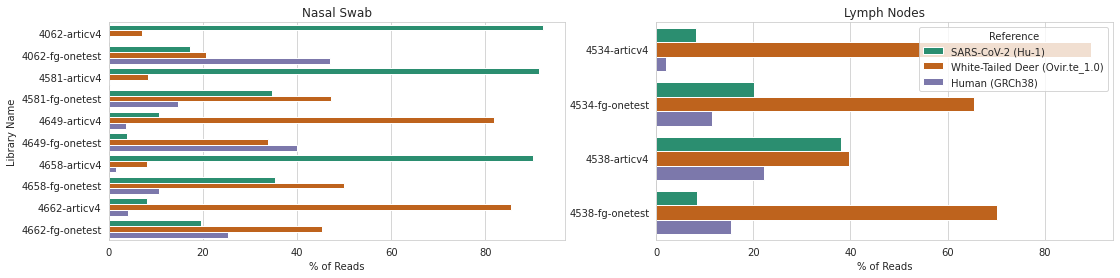

In [74]:
bwa_reports
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(18,4))
nasal = sns.barplot(ax=ax1, hue_order = hue_order, data = bwa_reports[bwa_reports['Isolation_source'] == 'nasal swab'], y='Library Name', x='% of Reads', hue='Reference')
nasal.get_legend().remove()
nasal.set_title('Nasal Swab')
rpln = sns.barplot(ax=ax2, hue_order = hue_order, data = bwa_reports[bwa_reports['Isolation_source'] != 'nasal swab'], y='Library Name', x='% of Reads', hue='Reference')
plt.title('Lymph Nodes')
plt.ylabel('')
plt.savefig('figures/bwa_read_mapping_composite.png', dpi=300)

In [106]:
bwa_reports.sort_values(['Sample', "Reference"])

,Sample,Reference,Reads,Isolation_source,Library Name,Total Reads,% of Reads
32,SRR18231904,Human (GRCh38),6363,nasal swab,4662-articv4,157186,4.048070
31,SRR18231904,SARS-CoV-2 (Hu-1),12809,nasal swab,4662-articv4,157186,8.148945
30,SRR18231904,White-Tailed Deer (Ovir.te_1.0),134191,nasal swab,4662-articv4,157186,85.370835
41,SRR18231905,Human (GRCh38),4149,nasal swab,4658-articv4,268194,1.547014
39,SRR18231905,SARS-CoV-2 (Hu-1),241684,nasal swab,4658-articv4,268194,90.115364
40,SRR18231905,White-Tailed Deer (Ovir.te_1.0),21755,nasal swab,4658-articv4,268194,8.111665
38,SRR18231906,Human (GRCh38),5180,nasal swab,4649-articv4,143046,3.621213
37,SRR18231906,SARS-CoV-2 (Hu-1),15176,nasal swab,4649-articv4,143046,10.609175
36,SRR18231906,White-Tailed Deer (Ovir.te_1.0),117171,nasal swab,4649-articv4,143046,81.911413
8,SRR18231907,Human (GRCh38),427,nasal swab,4062-articv4,217380,0.196430


In [32]:
tables1 = key_taxa[['% non-SC2 deer', '% non-SC2 Human']]
tables1['String'] = key_taxa['% non-SC2 deer'].round(2).astype(str) + "% vs " +  key_taxa['% non-SC2 Human'].round(2).astype(str) + "%"

Library Name
4062-articv4        79.12% vs 0.37%
4062-fg-onetest      0.33% vs 0.04%
4534-articv4        90.98% vs 1.71%
4534-fg-onetest      73.64% vs 4.3%
4538-articv4        55.5% vs 33.62%
4538-fg-onetest     66.63% vs 4.05%
4581-articv4         79.07% vs 3.1%
4581-fg-onetest     50.59% vs 1.48%
4649-articv4         83.3% vs 1.08%
4649-fg-onetest      1.38% vs 0.12%
4658-articv4       65.47% vs 11.87%
4658-fg-onetest      64.67% vs 1.3%
4662-articv4        85.69% vs 1.38%
4662-fg-onetest     31.25% vs 0.86%
dtype: object

## Neutralisation and Binding

In [38]:
id50_2_dose = pd.read_csv('analyses/neutralisation_and_binding_assays/2 doses_9-3-22.csv')
id50_3_dose = pd.read_csv('analyses/neutralisation_and_binding_assays/3 doses_9-3-22.csv')
id50_convalescent = pd.read_csv('analyses/neutralisation_and_binding_assays/Convalescent_9-3-22.csv')
id50_2_dose['Sera'] = '2 doses (BNT162b2)'
id50_2_dose = pd.melt(id50_2_dose, id_vars='Sera', var_name='Sample', value_name='ID50')

id50_3_dose['Sera'] = '3 doses (BNT162b2)'
id50_3_dose = pd.melt(id50_3_dose, id_vars='Sera', var_name='Sample', value_name='ID50')

id50_convalescent['Sera'] = 'Convalescent'
id50_convalescent = pd.melt(id50_convalescent, id_vars='Sera', var_name='Sample', value_name='ID50')

id50 = pd.concat([id50_2_dose, id50_3_dose, id50_convalescent])

id50['Sample'].unique()
id50['Sample'] = id50['Sample'].replace({'D614G': 'Ancestral D614G', 
                                         '4581/4645': 'Deer 4581/4645', 
                                         '4658': 'Deer 4658',
                                         'ON_PHL_21_44225': 'ON-PHL-21-44225'})

In [39]:
plasma_binding = pd.read_csv('analyses/neutralisation_and_binding_assays/Plasma binding.csv').T
plasma_binding = plasma_binding.reset_index()
plasma_binding.columns = plasma_binding.loc[0]
plasma_binding = plasma_binding.drop(0)
plasma_binding['Sample'] = plasma_binding['Unnamed: 0'].str.split('.').str.get(0) 
plasma_binding = plasma_binding.drop(['Unnamed: 0', 'Naïve'], axis=1)
plasma_binding = pd.melt(plasma_binding, id_vars=['Sample'], var_name='Sera', value_name='Plasma binding\n(MFI normalized to CV3-25)')
plasma_binding['Sample'] = plasma_binding['Sample'].replace({'D614G': 'Ancestral D614G', 
                                         '4581/4645': 'Deer 4581/4645', 
                                         '4658': 'Deer 4658',
                                         'ON_PHL_21_44225': 'ON-PHL-21-44225'})

plasma_binding['Sera'] = plasma_binding['Sera'].replace({'2 doses': '2 doses (BNT162b2)', 
                                   '3 doses': '3 doses (BNT162b2)'})

plasma_binding['Plasma binding\n(MFI normalized to CV3-25)'] = plasma_binding['Plasma binding\n(MFI normalized to CV3-25)'].astype(str).str.replace('*', '').astype(float)

/home/fin/miniconda3/envs/eda/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  app.launch_new_instance()


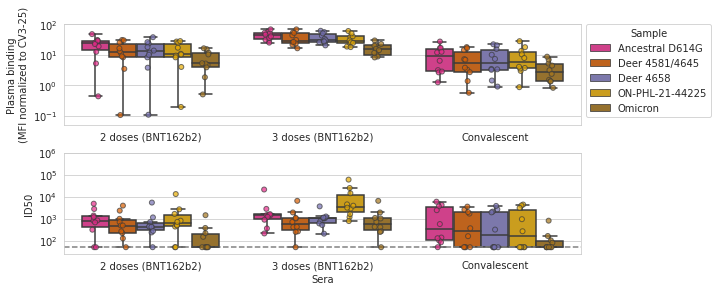

In [71]:
palette = sns.color_palette('Dark2').as_hex()

custom = [palette[3], palette[1], palette[2], palette[5], palette[6]]
hue_order = ['Ancestral D614G', 'Deer 4581/4645', 'Deer 4658',
       'ON-PHL-21-44225', 'Omicron']
fig = plt.figure(figsize=(10,4))



ax1 = fig.add_subplot(211)


plasma_plot = sns.boxplot(x='Sera', 
                          y='Plasma binding\n(MFI normalized to CV3-25)',
                          hue="Sample",
                          #legend=False,
                          #height=6, 
                          #aspect=1.3,
                          whis=np.inf,
                          fliersize=0,
                          ax=ax1,
                          #capsize=0.02,
                          palette=custom,
                          hue_order=hue_order,
                          data=plasma_binding);

barplot_annotate_brackets(0,1)

# for bar in ax1.containers:
#     bar[0.set_alpha(0)

# make grouped stripplot
plasma_plot = sns.stripplot(x='Sera', 
                            y='Plasma binding\n(MFI normalized to CV3-25)', 
                            hue='Sample',
                            jitter=True,
                            dodge=True, 
                            alpha=0.7,
                            linewidth=1,
                            ax=ax1,
                            palette=custom,
                            hue_order=hue_order,
                            data=plasma_binding)
plt.yscale('log')
plt.ylim(0.05,100)
handles, labels = plasma_plot.get_legend_handles_labels()
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1,1.05), title='Sample')
plt.xlabel('')
ax2 = fig.add_subplot(212)

id50_plot = sns.boxplot(x='Sera', 
                          y='ID50',
                          hue="Sample",
                          #whis=np.inf,
                          fliersize=0,
                          #capsize=0.02,
                          hue_order=hue_order,
                          palette=custom,
                          ax=ax2,
                          data=id50);
# for bar in ax2.containers:
#     bar.set_alpha(0)

# make grouped stripplot
id50_plot = sns.stripplot(x='Sera', 
                            y='ID50', 
                            hue='Sample',
                            jitter=True,
                            dodge=True, 
                            alpha=0.7,
                            linewidth=1,
                            ax=ax2,
                            hue_order=hue_order,
                            palette=custom,
                            data=id50)

# how to remove redundant legends in Python
# Let us first get legend information from the plot object
#handles, labels = id50_plot.get_legend_handles_labels()
# l = plt.legend(handles[0:5], labels[0:5],  title='Samples', loc='upper left', 
id50_plot.get_legend().remove()
plt.yscale('log')
_ = plt.ylim(25,10e5)
plt.axhline(y=50, linestyle='dashed', color='grey')
#l = id50_plot.get_ylabel()


plt.close(2)
plt.close(3)
plt.tight_layout()
# to be edited with A/B subpanels
plt.savefig('figures/intermediate/neutralisation_and_binding.svg',dpi=300, bbox_inches='tight')

In [104]:
import statsmodels.stats
import statsmodels.stats.oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [114]:
for sera, data in plasma_binding.groupby('Sera'):
    print("# " + sera)
    print(stats.oneway.anova_oneway(data=data['Plasma binding\n(MFI normalized to CV3-25)'], groups=data['Sample']))
    print(pairwise_tukeyhsd(endog=data['Plasma binding\n(MFI normalized to CV3-25)'], groups=data['Sample'], alpha=0.05))
    print()

# 2 doses (BNT162b2)
statistic = 3.1415366443518806
pvalue = 0.035008133107404145
df = (4.0, 21.719513572638483)
df_num = 4.0
df_denom = 21.719513572638483
nobs_t = 50.0
n_groups = 5
means = [21.989355  14.7606392 15.3061196 14.0455549  7.5280647]
nobs = [10. 10. 10. 10. 10.]
vars_ = [185.55545067 114.26083609 127.31242961  96.84175985  31.03440319]
use_var = unequal
welch_correction = True
tuple = (3.1415366443518806, 0.035008133107404145)
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------
Ancestral D614G  Deer 4581/4645  -7.2287 0.5408 -20.6174    6.16  False
Ancestral D614G       Deer 4658  -6.6832  0.605  -20.072  6.7055  False
Ancestral D614G ON-PHL-21-44225  -7.9438 0.4542 -21.3325  5.4449  False
Ancestral D614G         Omicron -14.4613 0.0284   -27.85 -1.0726   True
 Deer 4581/4645       Deer 4658   0.5455    0.9 -12

In [116]:
for sera, data in id50.groupby('Sera'):
    print("# " + sera)
    print(stats.oneway.anova_oneway(data=data['ID50'], groups=data['Sample']))
    print(pairwise_tukeyhsd(endog=data['ID50'], groups=data['Sample'], alpha=0.05))
    print()

# 2 doses (BNT162b2)
statistic = 2.2041972998935226
pvalue = 0.10542855231095409
df = (4.0, 19.92001973630326)
df_num = 4.0
df_denom = 19.92001973630326
nobs_t = 50.0
n_groups = 5
means = [1293.04844  959.28347  958.44723 2072.17698  249.13626]
nobs = [10. 10. 10. 10. 10.]
vars_ = [ 2185750.01526094  1540990.08069234  2567506.86959131 16220488.32140138
   188358.98806184]
use_var = unequal
welch_correction = True
tuple = (2.2041972998935226, 0.10542855231095409)
             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
     group1          group2      meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------------------
Ancestral D614G  Deer 4581/4645   -333.765    0.9 -3041.6709  2374.141  False
Ancestral D614G       Deer 4658  -334.6012    0.9 -3042.5072 2373.3047  False
Ancestral D614G ON-PHL-21-44225   779.1285    0.9 -1928.7774 3487.0345  False
Ancestral D614G         Omicron -1043.9122  0.784 -3751.8181 1663

# C>T


In [127]:
nextclade = pd.read_csv('nextclade/subsample_earliest_latest_per_lineage_and_animal_and_usher_closest_and_deer_pho_output.tsv', sep='\t').set_index('seqName')
metadata = pd.read_csv('nextclade/subsample_earliest_latest_per_lineage_and_animal_and_usher_closest.tsv', sep='\t').set_index('strain')
nextclade['host'] = metadata['host']
nextclade['PANGO Lineage'] = metadata['pango_lineage']
nextclade = nextclade.drop_duplicates()

for on_WTD in ['4538 MN908947.3', '4535 MN908947.3', '4542 MN908947.3', '4534 MN908947.3', '4581 MN908947.3']:
    nextclade.loc[on_WTD, 'host'] = 'Ontario WTD clade'
nextclade.loc['Canada/ON-PHL-21-44225/2021', 'host'] = 'Ontario WTD clade'

In [133]:
def get_perc_subs_c_t(sub_list):
    ct_count = 0
    sub_list = sub_list.split(',')
    for sub in sub_list:
        if sub[0] == 'C' and sub[-1] == 'T':
            ct_count+=1
    return ct_count / len(sub_list) * 100


nextclade['% C>U Substitutions'] = nextclade['substitutions'].dropna().apply(lambda lst: get_perc_subs_c_t(lst))
nextclade = nextclade[~nextclade['% C>U Substitutions'].isna()]
nextclade = nextclade[nextclade['% C>U Substitutions'] != np.inf]

In [134]:
global_human = nextclade.loc[nextclade['host'] == 'Human']
global_human.loc[:, 'Sequence Group'] = "Global human"

b1 = nextclade.loc[nextclade['PANGO Lineage'] == 'B.1']
b1.loc[:, 'Sequence Group'] = "B.1 lineage"

wtd_human = nextclade.loc[nextclade['host'] == 'Ontario WTD clade']
wtd_human.loc[:, 'Sequence Group'] = 'Ontario WTD clade'

global_animal = nextclade.loc[~nextclade['host'].isin(['Human', 'Ontario WTD clade'])]
global_animal.loc[:, 'Sequence Group'] = 'Global animal'

nextclade_plotting = pd.concat([global_human, b1, wtd_human, global_animal])

/home/fin/miniconda3/envs/eda/lib/python3.7/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/fin/miniconda3/envs/eda/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [135]:
print(sns.color_palette("Dark2").as_hex())

['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666']


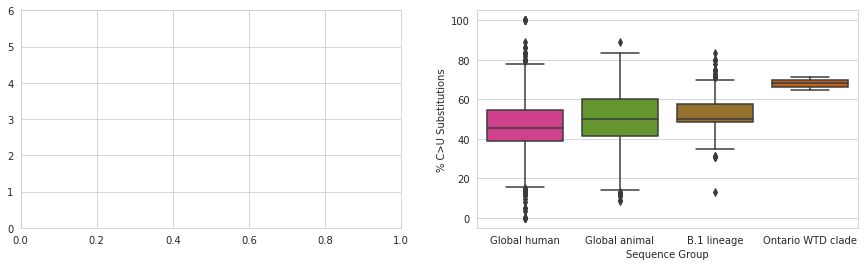

In [136]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15,4))

palette = ['#e7298a', '#66a61e', '#a6761d', '#d95f02']
ax1.set_ylim(0,6)
ct = sns.boxplot(ax=ax2, data = nextclade_plotting, palette=palette, x='Sequence Group', order = ['Global human', 'Global animal', 'B.1 lineage', 'Ontario WTD clade'], y='% C>U Substitutions')

# ax1.text(-0.12, 1, "B", transform=ax.transAxes, 
#             size=14, weight='bold')

# ax2.text(0.23, 1, "C", transform=ax.transAxes, 
#             size=14, weight='bold')

plt.savefig('sequence_parameter_figure.svg', dpi=300, bbox_inches='tight')